<a href="https://colab.research.google.com/github/sanadv/MLCourse/blob/main/Cleaning_Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

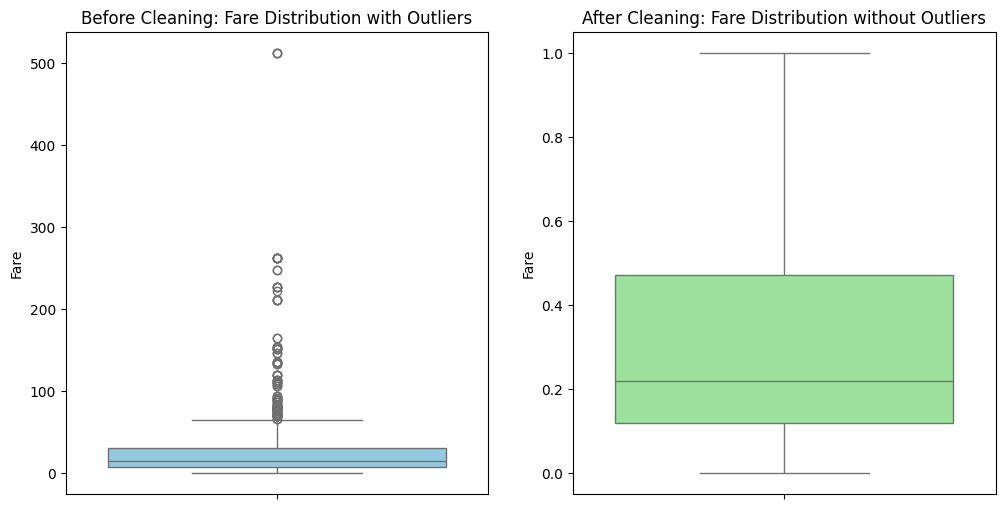

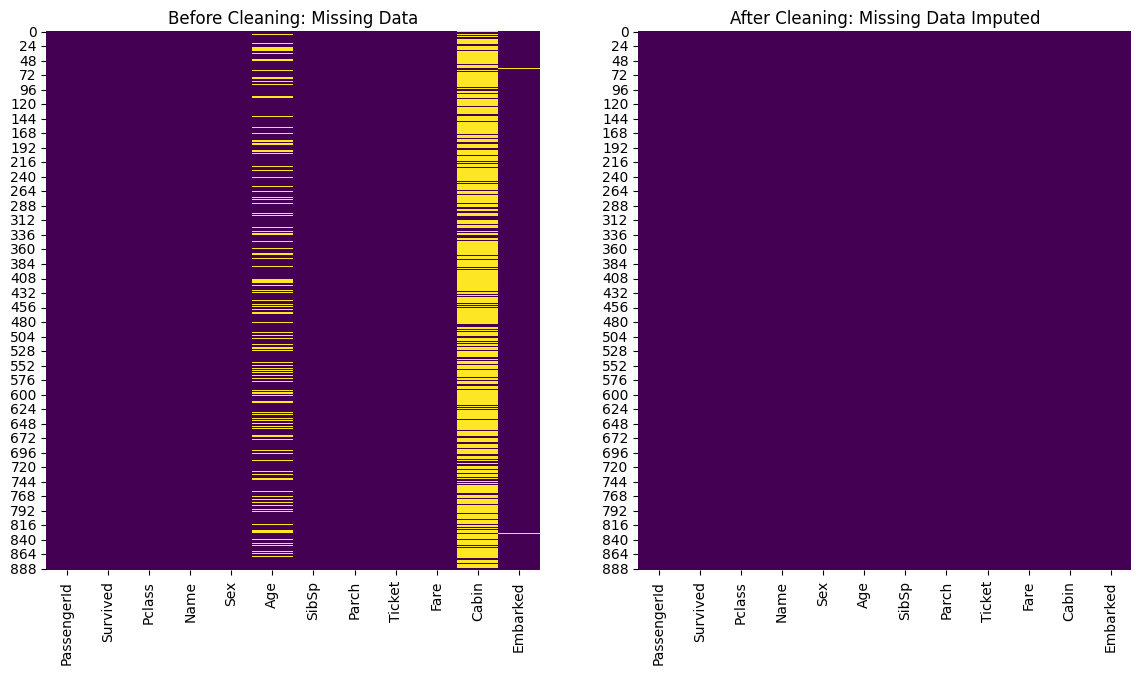

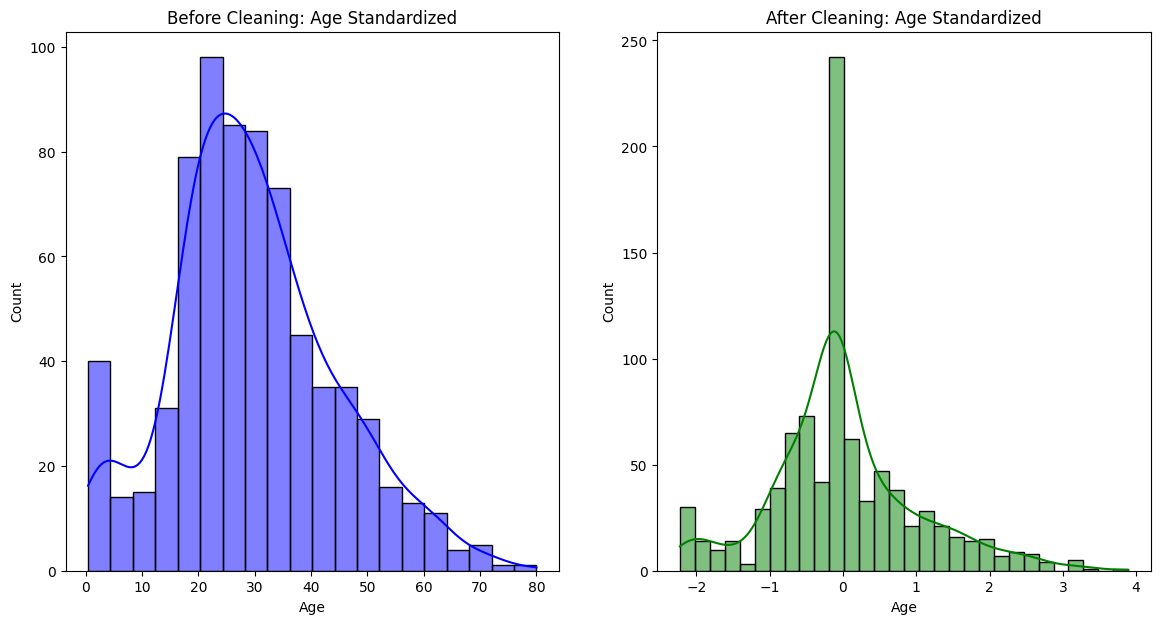

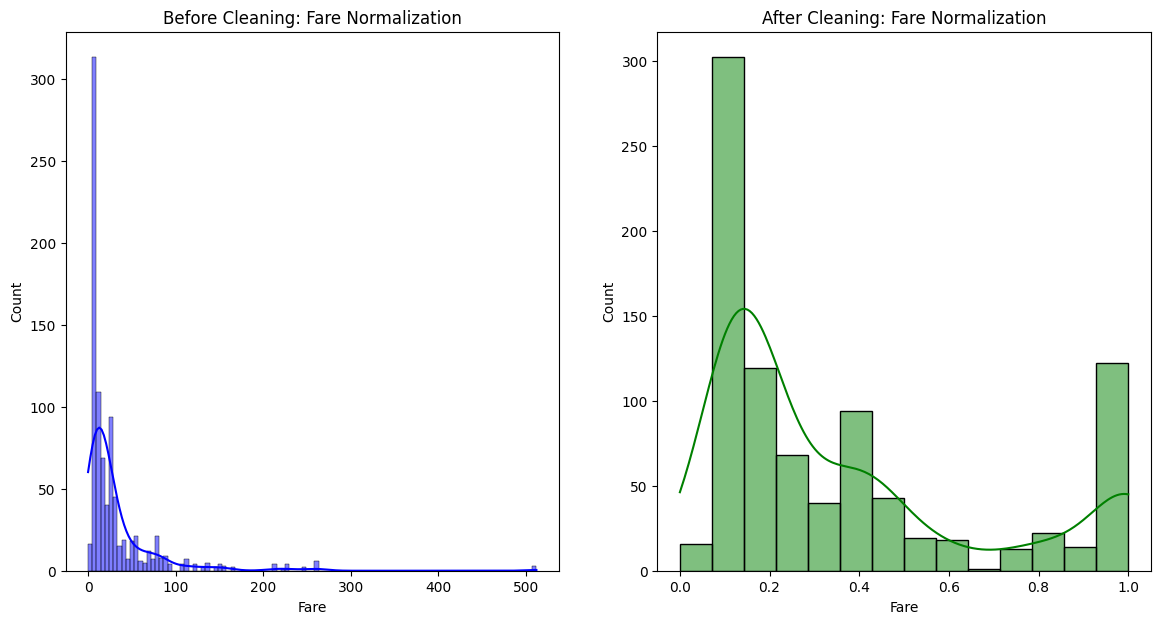

,Original Ticket,Corrected Ticket
0,A/5 21171,A521171
1,PC 17599,PC17599
2,STON/O2. 3101282,STONO23101282
3,113803,113803
4,373450,373450
5,330877,330877
6,17463,17463
7,349909,349909
8,347742,347742
9,237736,237736


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import numpy as np
import seaborn as sns


# Load the dataset
dtitanic = pd.read_csv('train.csv')
titanic = pd.read_csv('train.csv')

# Cleaning the data
# Handling missing values more comprehensively
# Age: Impute with median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
# Cabin: Prediction Model or Mark as 'Unknown' (simplified here as 'Unknown')
titanic['Cabin'].fillna('Unknown', inplace=True)
# Embarked: Impute with the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Dealing with duplicates
titanic.drop_duplicates(inplace=True)

# Correcting inconsistencies using Regular Expressions & Manual Review
# Simplified example: Ensure 'Ticket' formatting is consistent (manual review step is assumed)
titanic['Ticket'] = titanic['Ticket'].str.replace('[^a-zA-Z0-9]', '', regex=True)


# Outlier Detection and Treatment for 'Fare'
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = titanic[(titanic['Fare'] < (Q1 - 1.5 * IQR)) | (titanic['Fare'] > (Q3 + 1.5 * IQR))]

# Capping outliers in 'Fare'
titanic.loc[titanic['Fare'] > (Q3 + 1.5 * IQR), 'Fare'] = Q3 + 1.5 * IQR


# Outlier Detection and Treatment for 'Fare' using Z-score
z_scores = stats.zscore(titanic['Fare'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)  # Keep only rows where Z-score is less than 3
titanic = titanic[filtered_entries]





# Data Transformation
# Standardization of 'Age' and 'Fare' using StandardScaler
scaler = StandardScaler()
titanic[['Age']] = scaler.fit_transform(titanic[['Age']])


# Normalization of 'SibSp' and 'Parch' using MinMaxScaler
min_max_scaler = MinMaxScaler()
titanic[[ 'Fare']] = min_max_scaler.fit_transform(titanic[[ 'Fare']])




# Visualizing 'Fare' distribution before and after outlier capping
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=dtitanic['Fare'], color='skyblue')
plt.title('Before Cleaning: Fare Distribution with Outliers')

# Assuming 'cleaned_titanic' is your DataFrame after cleaning
plt.subplot(1, 2, 2)
sns.boxplot(y=titanic['Fare'], color='lightgreen')
plt.title('After Cleaning: Fare Distribution without Outliers')
plt.show()


# Assuming 'titanic' is your original dataset with missing values
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(dtitanic.isnull(), cbar=False, cmap='viridis')
plt.title('Before Cleaning: Missing Data')

# Assuming 'cleaned_titanic' is after imputation
plt.subplot(1, 2, 2)
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('After Cleaning: Missing Data Imputed')
plt.show()
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(dtitanic['Age'].dropna(), kde=True, color='blue')
plt.title('Before Cleaning: Age Standardized')

plt.subplot(1, 2, 2)
sns.histplot(titanic['Age'], kde=True, color='green')
plt.title('After Cleaning: Age Standardized')
plt.show()

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(dtitanic['Fare'].dropna(), kde=True, color='blue')
plt.title('Before Cleaning: Fare Normalization')

plt.subplot(1, 2, 2)
sns.histplot(titanic['Fare'], kde=True, color='green')
plt.title('After Cleaning: Fare Normalization')
plt.show()


# Assuming dtitanic is the original dataset and titanic is the dataset after correcting inconsistencies
sample_tickets_original = dtitanic['Ticket'].head(50)  # Sample of original ticket entries
sample_tickets_corrected = titanic['Ticket'].head(50)  # Sample of corrected ticket entries

comparison_df = pd.DataFrame({
    'Original Ticket': sample_tickets_original,
    'Corrected Ticket': sample_tickets_corrected
})

comparison_df

